<a href="https://colab.research.google.com/github/Luandersonsouza/DU-starter/blob/main/DU_Starter_exerc%C3%ADcio_11_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
URL = 'https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/master/Data/Chapter_1_cleaned_data.csv'
df = pd.read_csv(URL)
df.head()

# Feature Selection




In [ ]:
df.columns

## Manual

In [ ]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

features_response = [col for col in df.columns if col not in items_to_remove]
features_response

### Correlação de Pearson

In [ ]:
import seaborn as sns

corr = df.corr(numeric_only=True)

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

In [ ]:
corr['default payment next month'].abs().sort_values(ascending = False)

Correlação linear é legal, mas não foi projetada para comparar features (colunas) contínuas com categóricas que é o que buscamos. Sendo necessário explorar novas técnicas.

### Teste F

Exercício 11


In [7]:
target_name = 'default payment next month'
X = df[features_response].drop(columns=[target_name]).values
y = df[target_name].values

In [8]:
from sklearn.feature_selection import f_classif
#f_classif?
f_stat, f_p_values =  f_classif(X,y)

In [ ]:
pd.DataFrame({'Feature': features_response[:-1],
              'F statistic': f_stat,
              'p value': f_p_values}).sort_values(by= 'p value')

In [ ]:
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(f_classif, percentile =20)
selector.fit(X,y)

In [ ]:
best_feature_ix = selector.get_support()
best_feature_ix

In [12]:
import numpy as np

features = np.array(features_response[:-1])

In [ ]:
best_features = list(features[best_feature_ix])
best_features

## Exercício 12

In [ ]:
overall_default_rate = df[target_name].mean()
overall_default_rate

In [ ]:
group_by_pay_mean_y = df.groupby('PAY_1')[target_name].mean()
group_by_pay_mean_y

In [16]:
import matplotlib.pyplot as plt

In [ ]:
axes = plt.axes()
axes.axhline(overall_default_rate, color = 'red')
group_by_pay_mean_y.plot(marker='x', legend = False, ax = axes);

In [18]:
pos_mask = y == 1
neg_mask = y == 0

In [ ]:
axes =plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'])
axes.hist(df.loc[pos_mask, 'LIMIT_BAL']);

In [ ]:
bin_edges = list(range(0, 850000, 50000))
print(bin_edges[-1])

In [ ]:
axes =plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], density = True, bins = bin_edges, alpha = 0.5)
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], density = True, bins = bin_edges, alpha = 0.5);

## Sigmóide

Será utilizado para converter um número real que ficará entre 0 e 1.
R -> (0,1).


 O que o modelo de classificação irá fazer?

 Necessário um conjunto de features -> **X[0]**
 Daí ele retorna uma classe de duas ou mais possíveis classes.

 X[0] --> [0] , [1]

Não buscamos saber apenas a classe final, é interessante saber a confiança (probabilidade) de ser a classe que ele está indicando.


X[0] --> {0: 20%, 1: 80%}



O modelo de regressão logística faz o seguinte:

X[0] --> {0: 20%, 1: 80%} ==> [1]

É 1 porque existe um limiar de decisão. Ou seja, se uma das classes tem mais que 50% de chance, o modelo decide que o resultado é essa classe.


Sigmoíde é necessário para chegarmos nas probabilidades que podem estar descalibradas, transformando os números para 0 e 1, facilitando o entedimento.

Onde sigmoide será denotado por  1/ (1+e^-(X))


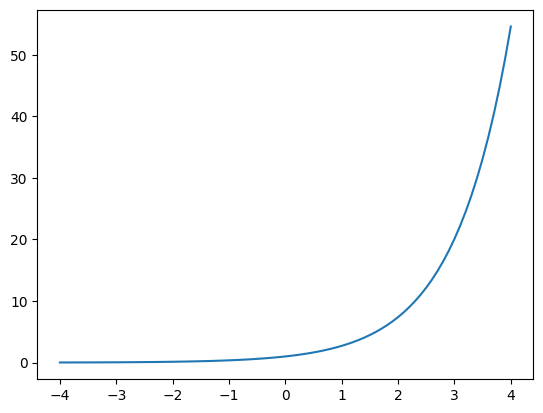

In [22]:
X_exp = np.linspace(-4,4, 81)
Y_exp = np.exp(X_exp)
plt.plot(X_exp, Y_exp);

# e^x

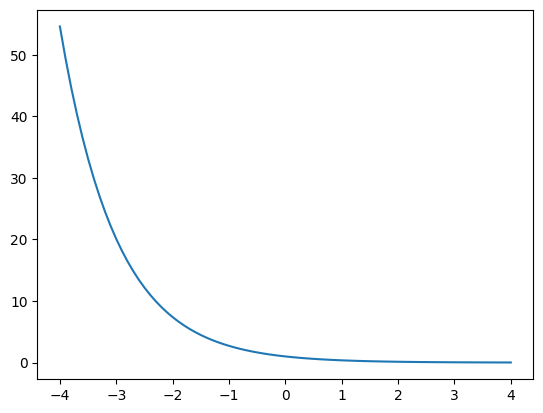

In [23]:
X_exp = np.linspace(-4,4, 81)
Y_exp = np.exp(X_exp)
plt.plot(-X_exp, Y_exp);

# e^-(x)

In [24]:
def sigmoid(X):
  return 1/ (1+ np.exp(-X))

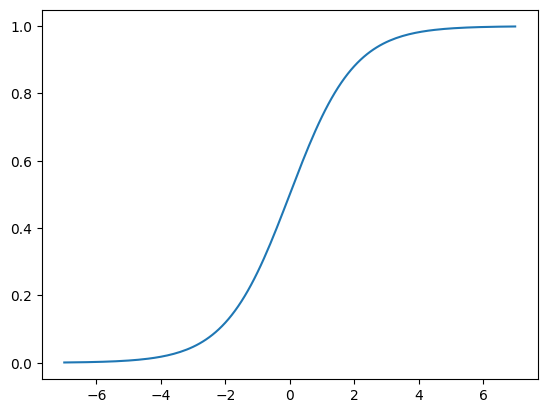

In [25]:
X_exp = np.linspace(-7,7, 141)
Y_exp = sigmoid(X_exp)

plt.plot(X_exp, Y_exp);

##Exercício 14

In [ ]:
group_by_pay_mean_y

In [ ]:
p = group_by_pay_mean_y.values
p

In [ ]:
q = 1-p
q

In [ ]:
odds_ratio = p/q
print(odds_ratio)
log_odds = np.log(odds_ratio)
log_odds

In [ ]:
group_by_pay_mean_y.index

In [ ]:
plt.plot(group_by_pay_mean_y.index, log_odds, '-x');

## Exercício 15

In [60]:
np.random.seed(42)
X_1_pos = np.random.uniform(low=1, high=7, size=(20,1))
X_1_neg = np.random.uniform(low=3, high=10, size=(20,1))
X_2_pos = np.random.uniform(low=1, high=7, size=(20,1))
X_2_neg = np.random.uniform(low=3, high=10, size=(20,1))

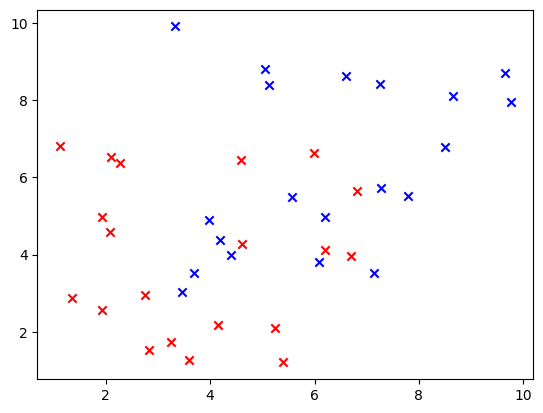

In [45]:
plt.scatter(X_1_pos,X_2_pos, color = 'red', marker= 'x')
plt.scatter(X_1_neg,X_2_neg, color = 'blue', marker= 'x');

In [ ]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
X

In [ ]:
 y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
 y

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression(solver = 'liblinear')

In [ ]:
lr.fit(X, y)

In [70]:
y_pred = lr.predict(X)
positive_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==1]
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]

In [ ]:
plt.scatter(X_1_pos,X_2_pos, color = 'red', marker= 'x')
plt.scatter(X_1_neg,X_2_neg, color = 'blue', marker= 'x')
plt.scatter(X[positive_indices,0],X[positive_indices,1], color = 'red', s= 150, marker= 'o', facecolors = 'none')
plt.scatter(X[negative_indices,0],X[negative_indices,1], color = 'blue',s= 150, marker= 'o', facecolors = 'none');

In [ ]:
theta_1 = lr.coef_[0][0]
theta_2 = lr.coef_[0][1]

print(theta_1, theta_2)

In [77]:
theta_0 = lr.intercept_

In [83]:
X_1_decision_boundary = np.array([0,10])
X_2_decision_boundary = -(theta_1/ theta_2) * X_1_decision_boundary - (theta_0/theta_2)

In [ ]:
plt.scatter(X_1_pos,X_2_pos, color = 'red', marker= 'x')
plt.scatter(X_1_neg,X_2_neg, color = 'blue', marker= 'x')
plt.scatter(X[positive_indices,0],X[positive_indices,1], color = 'red', s= 150, marker= 'o', facecolors = 'none')
plt.scatter(X[negative_indices,0],X[negative_indices,1], color = 'blue',s= 150, marker= 'o', facecolors = 'none')



plt.plot(X_1_decision_boundary, X_2_decision_boundary, 'k-');